In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def gd(x_start,df,epochs,lr):
    xs = np.zeros(epochs+1)
    x = x_start
    xs[0] = x
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
    """    
   

In [3]:
x_start = 5    
epochs = 15 
lr = 0.3   
x = gd(x_start, dfunc, epochs, lr=lr) 
print (x)

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


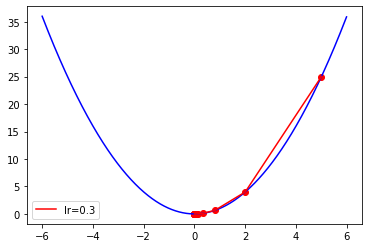

'藍色曲線是目標函數，紅色折線是以『梯度下降法』逼近最佳解的過程(由上而下)。'

In [4]:
color = 'r'
from numpy import arange
t = arange(-6.0,6.0,0.01)
plt.plot(t,func(t),c='b')
plt.plot(x,func(x),c=color,label='lr={}'.format(lr))
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()
"""藍色曲線是目標函數，紅色折線是以『梯度下降法』逼近最佳解的過程(由上而下)。"""

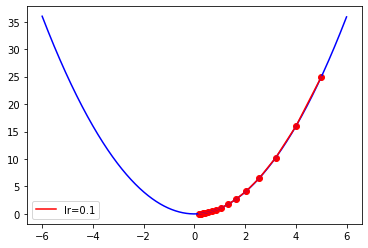

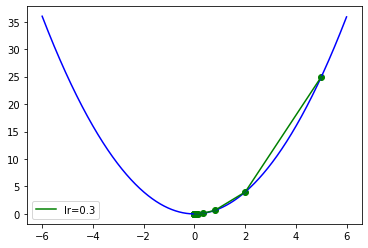

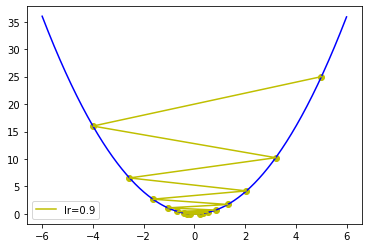

'学习率较小时，收敛到正确结果的速度较慢。\n\n学习率较大时，容易在搜索过程中发生震荡'

In [5]:
"""測試不同的lr"""
x_start = 5    
epochs = 15 
lr = [0.1,0.3,0.9]
color = ['r','g','y'] 
t = arange(-6.0,6.0,0.01)
for i in range(len(lr)):
    x = gd(x_start, dfunc, epochs, lr=lr[i]) 
    #plt.subplot(1,3,i+1)
    plt.plot(t,func(t),c='b')
    plt.plot(x,func(x),c=color[i],label='lr={}'.format(lr[i]))
    plt.scatter(x, func(x), c=color[i], )    
    plt.legend()

    plt.show()
"""学习率较小时，收敛到正确结果的速度较慢。

学习率较大时，容易在搜索过程中发生震荡"""

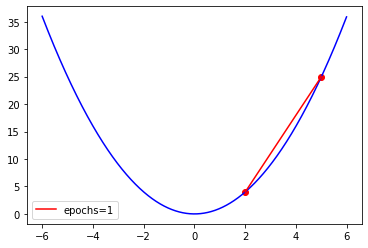

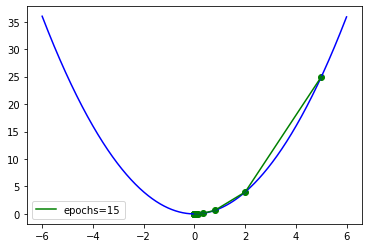

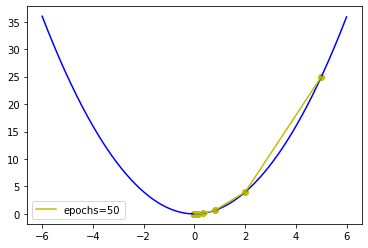

'一个epoch指代所有的数据送入网络中完成一次前向计算及反向传播的过程\n单个epoch更新权重是不够的'

In [6]:
"""測試不同的epochs"""
x_start = 5    
epochs = [1,15,50] 
lr = 0.3
color = ['r','g','y'] 
t = arange(-6.0,6.0,0.01)
for i in range(len(epochs)):
    x = gd(x_start, dfunc, epochs[i], lr=lr) 
    #plt.subplot(1,3,i+1)
    plt.plot(t,func(t),c='b')
    plt.plot(x,func(x),c=color[i],label='epochs={}'.format(epochs[i]))
    plt.scatter(x, func(x), c=color[i], )    
    plt.legend()

    plt.show()
"""一个epoch指代所有的数据送入网络中完成一次前向计算及反向传播的过程
单个epoch更新权重是不够的"""

Conclude: 瞭解神經網絡中最常用來優化(opitimization)模型的方式:Gradient Descent之運作過程。
在此可以探討的是找到"最合適的學習率"! 參考:https://www.twblogs.net/a/5efe3eb9e53eaf40aa872468

以簡單回歸模型為例:透過梯度下降法取得最佳w,b參數。

Epoch 0: Loss: 878.7965698242188
Epoch 1: Loss: 636.1309814453125
Epoch 2: Loss: 466.9711608886719
Epoch 3: Loss: 349.05157470703125
Epoch 4: Loss: 266.8509826660156
Epoch 5: Loss: 209.5497589111328
Epoch 6: Loss: 169.6055908203125
Epoch 7: Loss: 141.76089477539062
Epoch 8: Loss: 122.3506088256836
Epoch 9: Loss: 108.8198471069336
Epoch 10: Loss: 99.38765716552734
Epoch 11: Loss: 92.8125228881836
Epoch 12: Loss: 88.22903442382812
Epoch 13: Loss: 85.03388977050781
Epoch 14: Loss: 82.80653381347656
Epoch 15: Loss: 81.25383758544922
Epoch 16: Loss: 80.17142486572266
Epoch 17: Loss: 79.41686248779297
Epoch 18: Loss: 78.89080047607422
Epoch 19: Loss: 78.52406311035156
Epoch 20: Loss: 78.26837921142578
Epoch 21: Loss: 78.09009552001953
Epoch 22: Loss: 77.96578216552734
Epoch 23: Loss: 77.87907409667969
Epoch 24: Loss: 77.81861114501953
Epoch 25: Loss: 77.77640533447266
Epoch 26: Loss: 77.74695587158203
Epoch 27: Loss: 77.72637939453125
Epoch 28: Loss: 77.71200561523438
Epoch 29: Loss: 77.7019

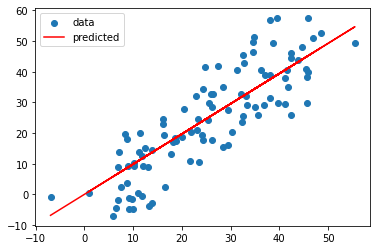

In [1]:
import numpy as np 
import tensorflow as tf 

# y_pred = W*X + b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

# 定義預測值
def predict(X):
    return W * X + b
    
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    # 執行訓練
    for epoch in range(epochs):
        with tf.GradientTape() as t:
            t.watch(tf.constant(X))
            current_loss = loss(y, predict(X))

        # 取得 W, b 個別的梯度
        dW, db = t.gradient(current_loss, [W, b])
        
        # 更新權重
        # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 


# 產生隨機資料
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# W、b 的最佳解
print(W.numpy(), b.numpy())

import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()

參考資料:
https://ithelp.ithome.com.tw/articles/10233555